# PENJELASAN

## Impor Library yang Diperlukan dan Memuat Data

In [38]:
# Import pandas and load the day.csv data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/day.csv")

## Inspeksi Awal Data

In [39]:
print(df.head())
print(df.info())
print(df.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

## Mengatasi Nilai yang Hilang (Missing Values)

### Periksa apakah ada nilai yang hilang

In [40]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Jika ada nilai yang hilang, Anda bisa mengisi dengan nilai rata-rata, median, atau menghapus baris tersebut

In [41]:
df.fillna(df.mean(), inplace=True)  # Mengisi dengan nilai rata-rata
# atau
df.dropna(inplace=True)  # Menghapus baris yang memiliki nilai hilang

C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\2071283108.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Mengisi dengan nilai rata-rata


## Menghapus Duplikat
### Periksa dan hapus baris duplikat

In [42]:
df.drop_duplicates(inplace=True)

## Penanganan Outliers
### Menggunakan metode Interquartile Range (IQR) untuk mendeteksi dan menangani outliers

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\3783187646.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\3783187646.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\3783187646.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


## Normalisasi Data:
### Normalisasi kolom numerik untuk memastikan skala yang konsisten

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

## Mengubah Format Kolom Tanggal
### Pastikan kolom dteday dalam format datetime

In [45]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Pengkodean Kategori (Categorical Encoding):
### Mengubah kolom kategori menjadi format numerik menggunakan one-hot encoding

In [46]:
df = pd.get_dummies(df, columns=['season', 'weathersit', 'weekday'], drop_first=True)

## Normalisasi Data
### Normalisasi kolom numerik untuk memastikan skala yang konsisten

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

## Menggabungkan Fitur Baru
### Menambahkan fitur baru yang relevan untuk analisis, misalnya rasio pengguna terdaftar terhadap total pengguna

In [48]:
df['registered_ratio'] = df['registered'] / df['cnt']
df['casual_ratio'] = df['casual'] / df['cnt']

## Visualisasi Distribusi Data
### Histogram untuk melihat distribusi kolom numerik

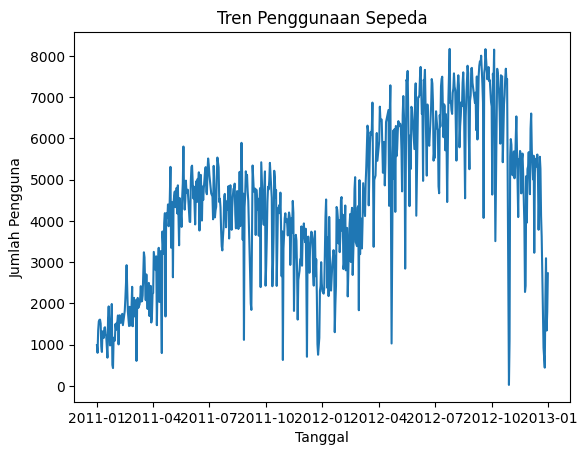

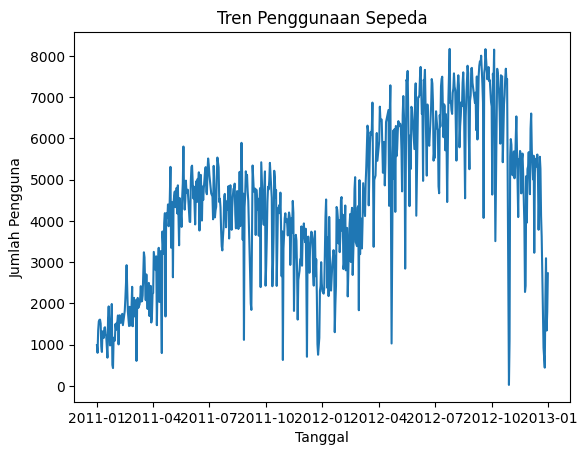

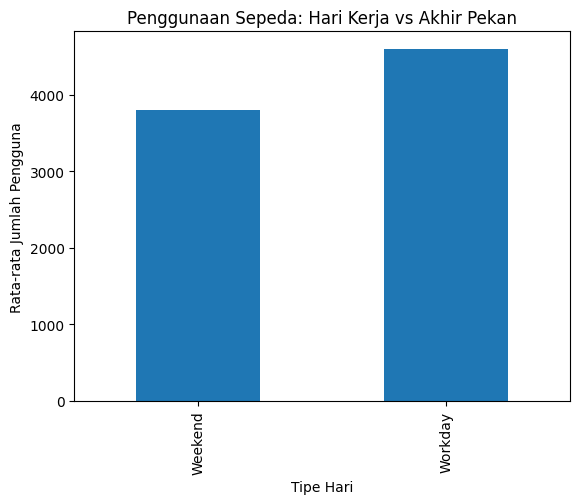

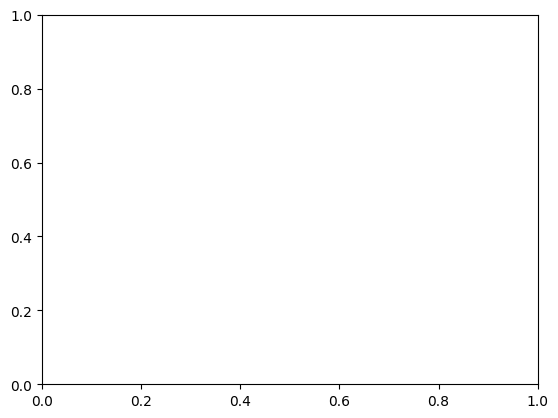

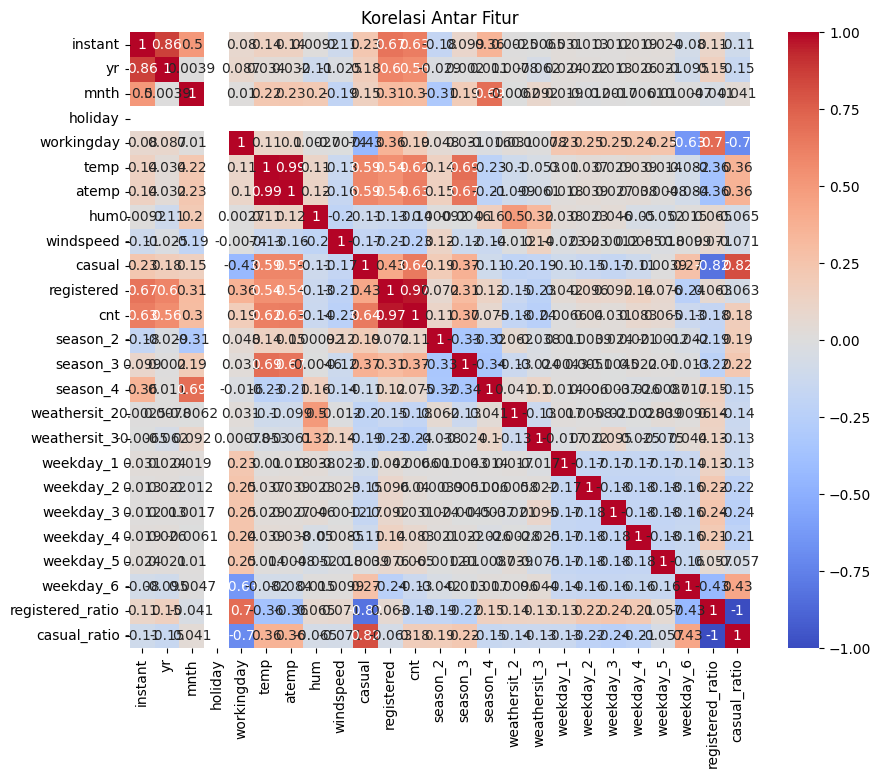

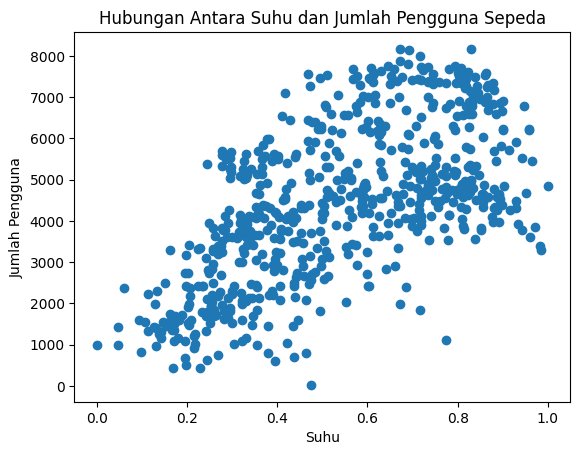

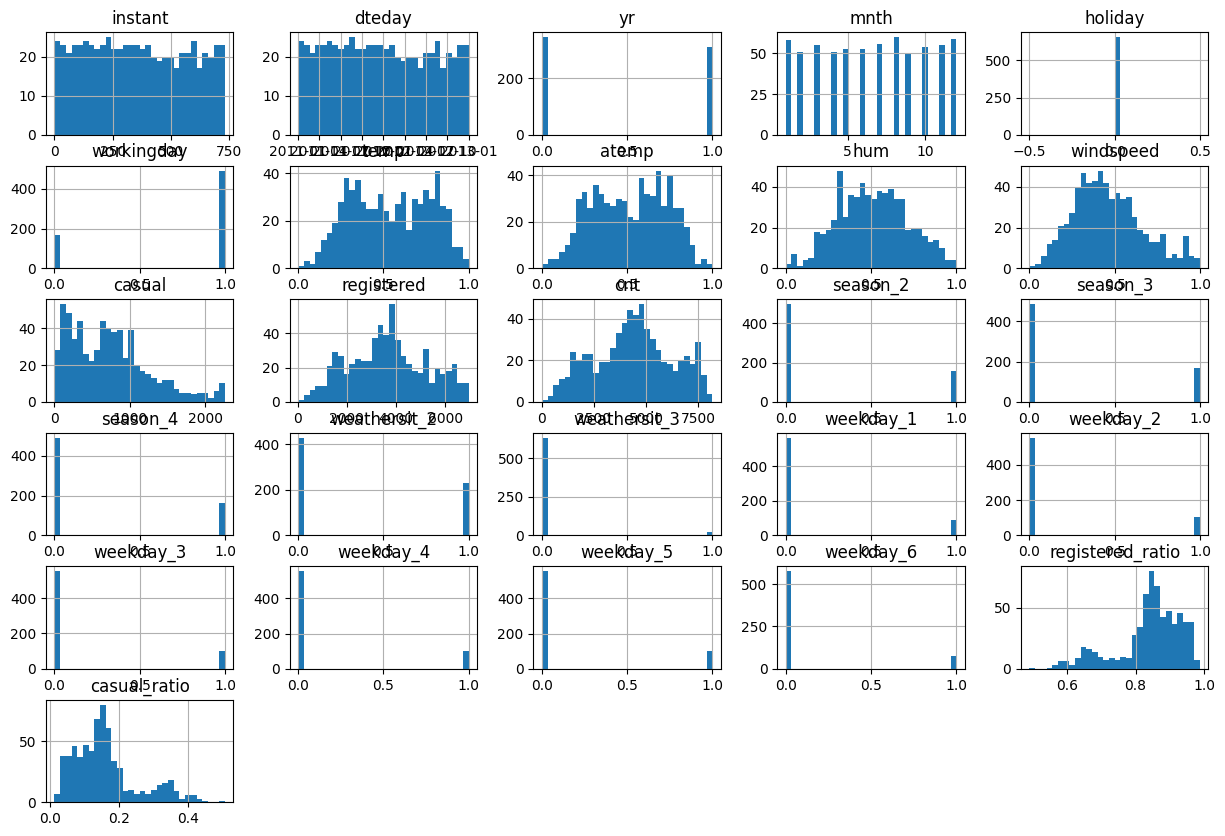

In [65]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

## Analisis Korelasi
### Heatmap untuk melihat korelasi antara fitur

C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\3494636733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


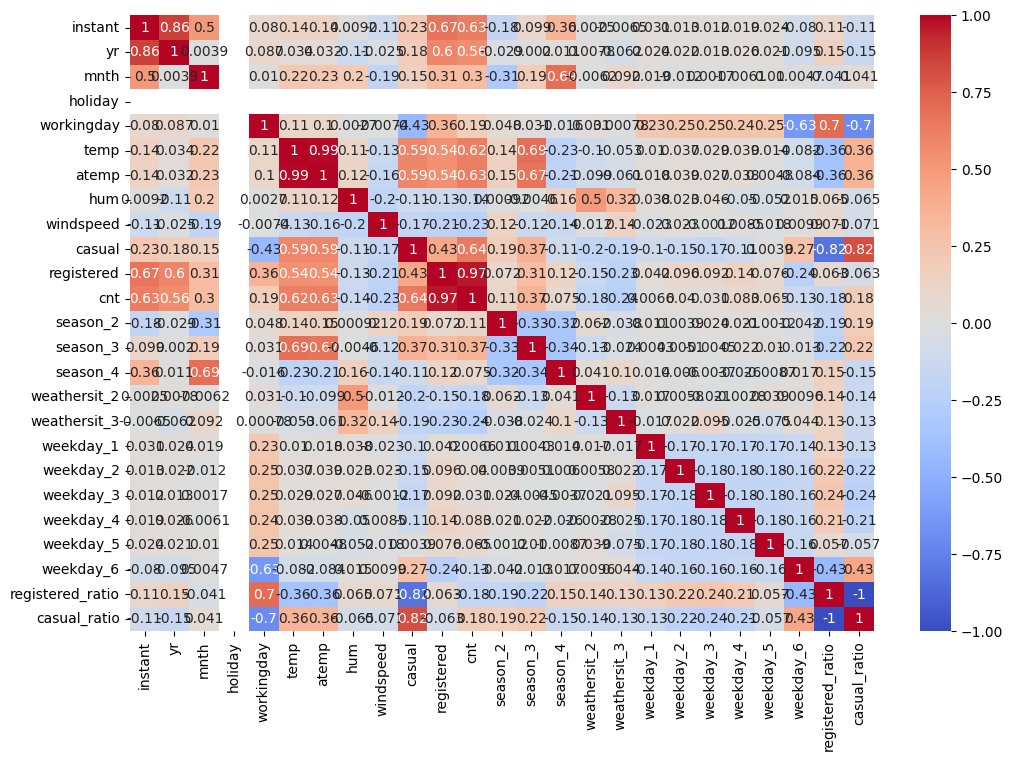

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Analisis Tren Waktu
### Line chart untuk melihat tren penggunaan sepeda dari waktu ke waktu

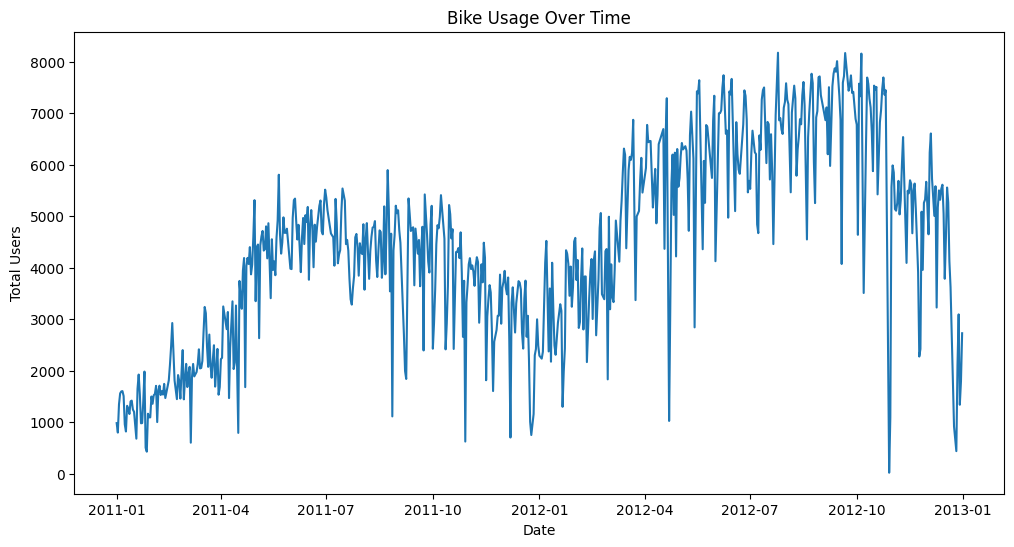

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.title('Bike Usage Over Time')
plt.show()

## Analisis Penggunaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan
### Bar chart untuk membandingkan jumlah pengguna sepeda pada hari kerja dan akhir pekan

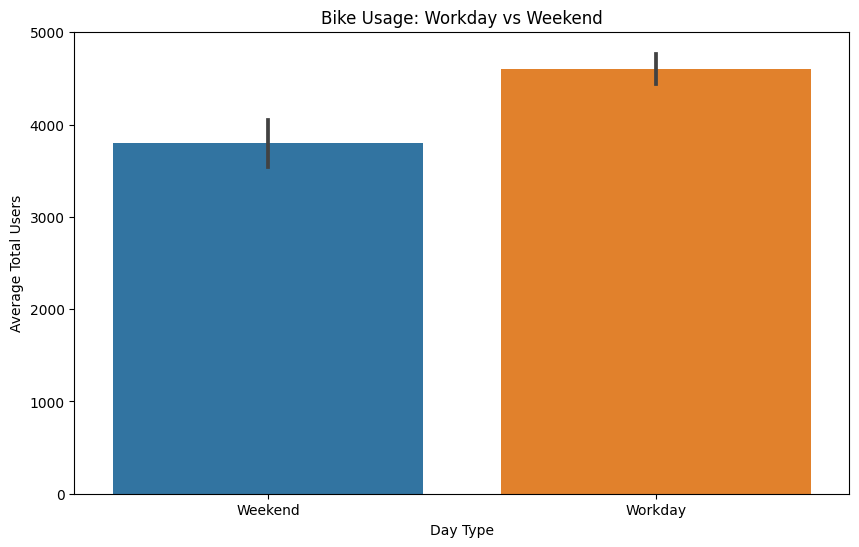

In [52]:
df['day_type'] = np.where(df['workingday'] == 1, 'Workday', 'Weekend')
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=df, estimator=np.mean)
plt.xlabel('Day Type')
plt.ylabel('Average Total Users')
plt.title('Bike Usage: Workday vs Weekend')
plt.show()

## Analisis Musiman
### Box plot untuk melihat distribusi jumlah pengguna sepeda berdasarkan musim

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Bike Usage by Season')
plt.show()

ValueError: Could not interpret input 'season'

## Statistik Deskriptif untuk Kolom Numerik:
### Menghitung mean, median, dan mode

In [54]:
mean_temp = df['temp'].mean()
median_temp = df['temp'].median()
mode_temp = df['temp'].mode()[0]
print(f"Mean Temp: {mean_temp}, Median Temp: {median_temp}, Mode Temp: {mode_temp}")

Mean Temp: 0.5385830500079278, Median Temp: 0.5316923863659302, Mode Temp: 0.7175617909513411


### Menghitung standar deviasi dan varians

In [55]:
std_temp = df['temp'].std()
var_temp = df['temp'].var()
print(f"Standard Deviation Temp: {std_temp}, Variance Temp: {var_temp}")

Standard Deviation Temp: 0.23054429800180182, Variance Temp: 0.0531506733411436


## Statistik Deskriptif untuk Kolom Kategori:
### Menghitung frekuensi dan proporsi

In [56]:
season_counts = df['season'].value_counts()
season_proportions = df['season'].value_counts(normalize=True)
print(f"Season Counts: {season_counts}")
print(f"Season Proportions: {season_proportions}")

KeyError: 'season'

## Visualisasi Statistik Deskriptif
### Histogram untuk melihat distribusi kolom numerik

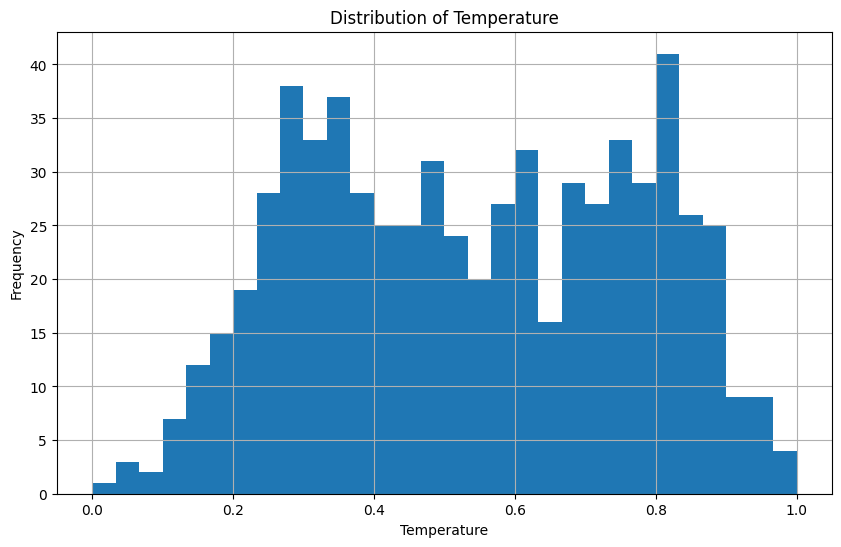

In [57]:
df['temp'].hist(bins=30)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

### Bar chart untuk melihat frekuensi kolom kategori

In [58]:
df['season'].value_counts().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Frequency of Seasons')
plt.show()

KeyError: 'season'

## Line Chart: Tren Penggunaan Sepeda dari Waktu ke Waktu
### Menampilkan jumlah total pengguna sepeda per hari.

In [60]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df['dteday'] = pd.to_datetime(df['dteday'])

st.title('Tren Penggunaan Sepeda dari Waktu ke Waktu')
fig, ax = plt.subplots()
ax.plot(df['dteday'], df['cnt'])
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Pengguna')
ax.set_title('Tren Penggunaan Sepeda')
st.pyplot(fig)

DeltaGenerator()

## Bar Chart: Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan:
### Membandingkan jumlah pengguna sepeda pada hari kerja dan akhir pekan.

In [61]:
df['day_type'] = df['workingday'].apply(lambda x: 'Workday' if x == 1 else 'Weekend')

st.title('Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
fig, ax = plt.subplots()
df.groupby('day_type')['cnt'].mean().plot(kind='bar', ax=ax)
ax.set_xlabel('Tipe Hari')
ax.set_ylabel('Rata-rata Jumlah Pengguna')
ax.set_title('Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
st.pyplot(fig)

DeltaGenerator()

## Box Plot: Distribusi Pengguna Sepeda Berdasarkan Musim:
### Melihat distribusi jumlah pengguna sepeda berdasarkan musim.

In [62]:
st.title('Distribusi Pengguna Sepeda Berdasarkan Musim')
fig, ax = plt.subplots()
df.boxplot(column='cnt', by='season', ax=ax)
ax.set_xlabel('Musim')
ax.set_ylabel('Jumlah Pengguna')
ax.set_title('Distribusi Pengguna Sepeda Berdasarkan Musim')
st.pyplot(fig)

KeyError: 'season'

## Heatmap: Korelasi Antar Fitur
### Menampilkan korelasi antara berbagai fitur dalam dataset.

In [63]:
import seaborn as sns

st.title('Korelasi Antar Fitur')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Korelasi Antar Fitur')
st.pyplot(fig)

C:\Users\ianan\AppData\Local\Temp\ipykernel_19516\1624694785.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)


DeltaGenerator()

## Scatter Plot: Hubungan Antara Suhu dan Jumlah Pengguna Sepeda:
### Menampilkan hubungan antara suhu dan jumlah pengguna sepeda.

In [64]:
st.title('Hubungan Antara Suhu dan Jumlah Pengguna Sepeda')
fig, ax = plt.subplots()
ax.scatter(df['temp'], df['cnt'])
ax.set_xlabel('Suhu')
ax.set_ylabel('Jumlah Pengguna')
ax.set_title('Hubungan Antara Suhu dan Jumlah Pengguna Sepeda')
st.pyplot(fig)

DeltaGenerator()